# Classification : Multi-Class


## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical    # 케라스에서 제공하는 가변수화 함수 

* 함수 만들기

In [2]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err')
    plt.plot(history['val_loss'], label='val_err')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [3]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/iris.csv"
data = pd.read_csv(path)
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2.데이터 준비

### (1) y 값을 0,1,2로 변환하기
(sparse_categorical_crossentropy 사용을 위해)

### 딥러닝에서는 항상 타겟값또한 숫자 타입이어야 한다 

In [4]:
data['Species'] = data['Species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### (2) 데이터 분할1 : x, y

In [5]:
target = 'Species'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

## 3.방법① : y를 one-hot encoding

* y 가변수화
* 컴파일에서 loss = 'categorical_crossentropy'

### (1) y에 대한 가변수화
* tf.keras.utils.to_categorical
* pd.get_dummies

In [6]:
y_c = to_categorical(y, 3)

In [7]:
y_c[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

### (2) 데이터 분할2 : train : val

In [8]:
x_train, x_val, y_train, y_val = train_test_split(x, y_c, test_size = .3, random_state = 2022)

### (3) Scaling

In [9]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (4) 모델 설계

In [10]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

4

In [11]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential()

# Layer 정의
layer = Dense(3, input_shape = (nfeatures,), activation = 'softmax')

# 모델에 추가
model.add(layer)

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


### (5) compile + 학습

* lr과 learning_rate은 같은 의미 입니다. 그러나 향후 버전에서는 lr이 제외될 예정이라고 합니다.
* y를 one-hot encoding 했다면, loss fuction은 **categorical_crossentropy** 입니다.

In [12]:
model.compile(optimizer=Adam(learning_rate=0.1), loss='categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 100,
                    validation_split=0.2).history

Epoch 1/100
3/3 [==============================] - 2s 255ms/step - loss: 1.1204 - val_loss: 0.9835
Epoch 2/100
3/3 [==============================] - 0s 35ms/step - loss: 0.9335 - val_loss: 0.8623
Epoch 3/100
3/3 [==============================] - 0s 37ms/step - loss: 0.8156 - val_loss: 0.7216
Epoch 4/100
3/3 [==============================] - 0s 41ms/step - loss: 0.7081 - val_loss: 0.6116
Epoch 5/100
3/3 [==============================] - 0s 46ms/step - loss: 0.6275 - val_loss: 0.5373
Epoch 6/100
3/3 [==============================] - 0s 44ms/step - loss: 0.5737 - val_loss: 0.4864
Epoch 7/100
3/3 [==============================] - 0s 44ms/step - loss: 0.5334 - val_loss: 0.4514
Epoch 8/100
3/3 [==============================] - 0s 23ms/step - loss: 0.5007 - val_loss: 0.4248
Epoch 9/100
3/3 [==============================] - 0s 23ms/step - loss: 0.4768 - val_loss: 0.4058
Epoch 10/100
3/3 [==============================] - 0s 52ms/step - loss: 0.4563 - val_loss: 0.3853
Epoch 11/100
3/3 [

* 학습결과 그래프

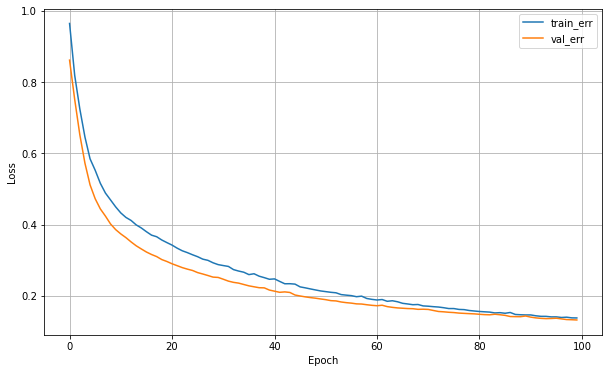

In [15]:
dl_history_plot(history)

### (6) 예측 및 평가
* 예측 결과는 softmax로 변환된 값 입니다.

In [16]:
# 확률값이므로 3값 합치면 1
pred = model.predict(x_val)
pred[:5]

2/2 [==============================] - 0s 4ms/step


array([[8.8029919e-06, 4.3928035e-02, 9.5606315e-01],
       [4.2006207e-07, 4.8965454e-02, 9.5103413e-01],
       [9.7231358e-01, 2.7685734e-02, 7.0956082e-07],
       [3.2001903e-04, 3.0959290e-01, 6.9008714e-01],
       [9.8761511e-01, 1.2384804e-02, 1.5254764e-07]], dtype=float32)

* 행 별로 제일 큰 값을 찾아서 그에 맞게 숫자(0,1,2)로 변환 합시다.

In [17]:
# 5개 행만 살펴보면
# numpy argmax(axis=1) : 행별로 가장 큰 값의 인덱스를 반환하는 함수.
np.argmax(pred[:5], axis = 1)

array([2, 2, 0, 2, 0], dtype=int64)

In [18]:
y_val

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [19]:
# 전체에 적용해서 변환합시다.
pred_1 = pred.argmax(axis=1)
pred_1

array([2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 1, 2, 1, 0, 0,
       2, 0, 2, 1, 2, 0, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2,
       2], dtype=int64)

* 실제값 y_val도 원래 대로 돌려 놓습니다.

In [20]:
y_val[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [21]:
y_val_1 = y_val.argmax(axis=1)
y_val_1

array([2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0,
       2, 0, 2, 2, 2, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2,
       2], dtype=int64)

In [22]:
print(confusion_matrix(y_val_1, pred_1))
print(classification_report(y_val_1, pred_1))

[[14  0  0]
 [ 0 14  1]
 [ 0  2 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.93      0.90        15
           2       0.93      0.88      0.90        16

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



## 4.방법② : y 그대로 사용

* y는 그대로 사용. (주의! 아래 두가지를 꼭 확인해야 합니다.)
    * y가 숫자로 인코딩되어 있어야 합니다. 
    * 그리고 0부터 시작해야 합니다.
* 컴파일에서 loss = 'sparse_categorical_crossentropy'

### (1) 데이터 분할2 : train : val

In [23]:
x.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [25]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 2022)

### (2) Scaling

In [26]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (3) 모델 설계

In [27]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

4

In [28]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential()

# Layer 정의
layer = Dense(3, input_shape = (nfeatures,), activation = 'softmax')

# 모델에 추가
model.add(layer)

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


### (4) compile + 학습

In [29]:
model.compile(optimizer=Adam(learning_rate=0.1), 
              loss='sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 50,
                    validation_split=0.2).history

Epoch 1/50
3/3 [==============================] - 1s 251ms/step - loss: 1.1547 - val_loss: 1.0539
Epoch 2/50
3/3 [==============================] - 0s 31ms/step - loss: 0.9466 - val_loss: 0.8822
Epoch 3/50
3/3 [==============================] - 0s 24ms/step - loss: 0.8194 - val_loss: 0.7387
Epoch 4/50
3/3 [==============================] - 0s 28ms/step - loss: 0.7031 - val_loss: 0.6293
Epoch 5/50
3/3 [==============================] - 0s 26ms/step - loss: 0.6338 - val_loss: 0.5519
Epoch 6/50
3/3 [==============================] - 0s 25ms/step - loss: 0.5707 - val_loss: 0.5007
Epoch 7/50
3/3 [==============================] - 0s 25ms/step - loss: 0.5330 - val_loss: 0.4621
Epoch 8/50
3/3 [==============================] - 0s 26ms/step - loss: 0.5058 - val_loss: 0.4355
Epoch 9/50
3/3 [==============================] - 0s 32ms/step - loss: 0.4796 - val_loss: 0.4114
Epoch 10/50
3/3 [==============================] - 0s 31ms/step - loss: 0.4571 - val_loss: 0.3933
Epoch 11/50
3/3 [===========

* 학습결과 그래프

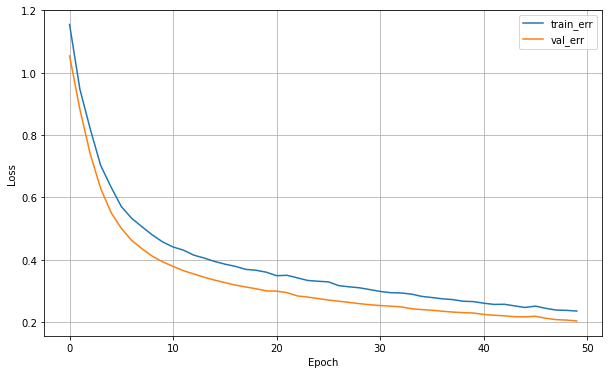

In [30]:
dl_history_plot(history)

### (5) 예측 및 평가
* 예측 결과는 softmax로 변환된 값 입니다.

In [31]:
pred = model.predict(x_val)
pred[:5]

2/2 [==============================] - 0s 5ms/step


array([[2.3909332e-04, 1.4186200e-01, 8.5789889e-01],
       [1.8191868e-05, 1.5275122e-01, 8.4723061e-01],
       [9.4557273e-01, 5.4260124e-02, 1.6717392e-04],
       [1.8121928e-03, 3.6303237e-01, 6.3515538e-01],
       [9.6799213e-01, 3.1925373e-02, 8.2503058e-05]], dtype=float32)

* 행 별로 제일 큰 값을 찾아서 그에 맞게 숫자(0,1,2)로 변환 합시다.

In [32]:
# 5개 행만 살펴보면
np.argmax(pred[:5], axis = 1)

array([2, 2, 0, 2, 0], dtype=int64)

In [33]:
# 전체에 적용해서 변환합시다.
pred_1 = pred.argmax(axis=1)
pred_1

array([2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 1, 2, 1, 0, 0,
       2, 0, 2, 1, 2, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2,
       2], dtype=int64)

* 실제값 y_val은 0,1,2 로 된 1차원 값입니다. 

In [34]:
y_val

128    2
105    2
30     0
137    2
17     0
8      0
79     1
80     1
0      0
67     1
91     1
131    2
58     1
100    2
118    2
5      0
95     1
129    2
103    2
92     1
36     0
43     0
111    2
39     0
115    2
133    2
121    2
20     0
68     1
146    2
38     0
82     1
89     1
1      0
74     1
6      0
34     0
69     1
44     0
59     1
147    2
66     1
57     1
107    2
139    2
Name: Species, dtype: int64

In [35]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[14  0  0]
 [ 0 15  0]
 [ 0  2 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      1.00      0.94        15
           2       1.00      0.88      0.93        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## 5.실습 : 와인 품질 분류

위 두가지 방법 중 한가지만 사용하시면 됩니다.


### (1) 데이터 전처리

In [12]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/winequality-white.csv"
data = pd.read_csv(path)
data['quality'] = np.where(data['quality'] == 3, 4, np.where(data['quality'] == 9, 8, data['quality']))
data['quality'] = data['quality'] - 4
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2


* 범주가 5개 입니다.
    * 0 - 최하  ~  4 - 최상

In [13]:
data['quality'].value_counts()

2    2198
1    1457
3     880
0     183
4     180
Name: quality, dtype: int64

* y에 대한 전처리
    * 여기서는 y를 그대로 두고, (그래서, 0 ~ 4로 범주를 맞췄습니다.)
    * sparse_categorical_crossentropy 를 적용합시다.

* 데이터 분할

In [14]:
target = 'quality'
x = data.drop(target, axis = 1)
y = data.loc[:, target]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size= .3
                                                  , random_state = 2022)

* 스케일링

In [15]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [16]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

11

In [17]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential([Dense(5, input_shape = (nfeatures,), activation = 'softmax')])

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 60        
                                                                 
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


* compile + 학습

In [18]:
epochs = 50

model.compile(optimizer=Adam(learning_rate=0.01), 
              loss='sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = epochs,
                    validation_split=0.2).history

Epoch 1/50
86/86 [==============================] - 2s 14ms/step - loss: 1.2838 - val_loss: 1.2537
Epoch 2/50
86/86 [==============================] - 0s 4ms/step - loss: 1.2197 - val_loss: 1.2239
Epoch 3/50
86/86 [==============================] - 0s 3ms/step - loss: 1.1951 - val_loss: 1.2071
Epoch 4/50
86/86 [==============================] - 0s 5ms/step - loss: 1.1803 - val_loss: 1.1944
Epoch 5/50
86/86 [==============================] - 1s 8ms/step - loss: 1.1682 - val_loss: 1.1830
Epoch 6/50
86/86 [==============================] - 1s 6ms/step - loss: 1.1591 - val_loss: 1.1774
Epoch 7/50
86/86 [==============================] - 0s 5ms/step - loss: 1.1522 - val_loss: 1.1707
Epoch 8/50
86/86 [==============================] - 0s 5ms/step - loss: 1.1440 - val_loss: 1.1612
Epoch 9/50
86/86 [==============================] - 0s 4ms/step - loss: 1.1405 - val_loss: 1.1583
Epoch 10/50
86/86 [==============================] - 1s 7ms/step - loss: 1.1338 - val_loss: 1.1536
Epoch 11/50
86/86 

* 학습결과 그래프

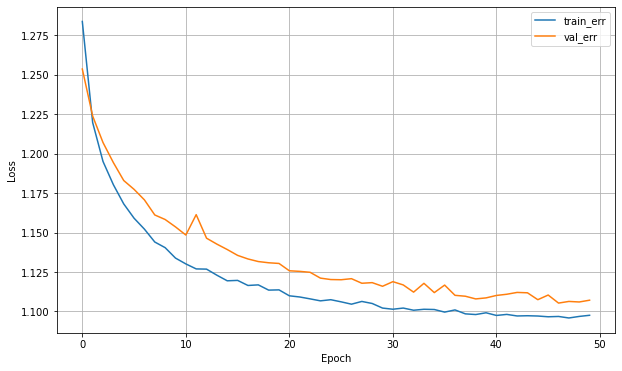

In [19]:
dl_history_plot(history)

In [20]:
pred = model.predict(x_val)
pred_1 = pred.argmax(axis=1)

46/46 [==============================] - 0s 2ms/step


In [21]:
pred[:2]

array([[0.44294876, 0.44482583, 0.07960793, 0.01999114, 0.0126263 ],
       [0.03289358, 0.4534197 , 0.42814866, 0.06882741, 0.01671068]],
      dtype=float32)

In [22]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[  0  32  22   1   0]
 [  0 196 242   1   0]
 [  0  96 538  24   0]
 [  0   5 226  44   0]
 [  0   0  26  17   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.60      0.45      0.51       439
           2       0.51      0.82      0.63       658
           3       0.51      0.16      0.24       275
           4       0.00      0.00      0.00        43

    accuracy                           0.53      1470
   macro avg       0.32      0.28      0.28      1470
weighted avg       0.50      0.53      0.48      1470



C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### (3) 실습1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ----|
| dense (Dense) | (None, 16) | 192 | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 5) | 85 | node, activation = 'softmax' |     

In [27]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential([Dense(16, input_shape=(nfeatures,), activation='relu'),
                    Dense(5, activation='softmax')])


# 모델요약
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 5)                 85        
                                                                 
Total params: 277
Trainable params: 277
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer=Adam(learning_rate=0.01), 
              loss='sparse_categorical_crossentropy')

In [37]:
history = model.fit(x_train, y_train, epochs = epochs,
                    validation_split=0.2).history

Epoch 1/50
86/86 [==============================] - 3s 14ms/step - loss: 1.0781 - val_loss: 1.0944
Epoch 2/50
86/86 [==============================] - 1s 8ms/step - loss: 1.0742 - val_loss: 1.0952
Epoch 3/50
86/86 [==============================] - 1s 7ms/step - loss: 1.0684 - val_loss: 1.0969
Epoch 4/50
86/86 [==============================] - 0s 4ms/step - loss: 1.0687 - val_loss: 1.0960
Epoch 5/50
86/86 [==============================] - 0s 4ms/step - loss: 1.0667 - val_loss: 1.0966
Epoch 6/50
86/86 [==============================] - 0s 4ms/step - loss: 1.0687 - val_loss: 1.0949
Epoch 7/50
86/86 [==============================] - 0s 4ms/step - loss: 1.0667 - val_loss: 1.0950
Epoch 8/50
86/86 [==============================] - 0s 4ms/step - loss: 1.0672 - val_loss: 1.0944
Epoch 9/50
86/86 [==============================] - 0s 3ms/step - loss: 1.0646 - val_loss: 1.0996
Epoch 10/50
86/86 [==============================] - 0s 3ms/step - loss: 1.0679 - val_loss: 1.0952
Epoch 11/50
86/86 

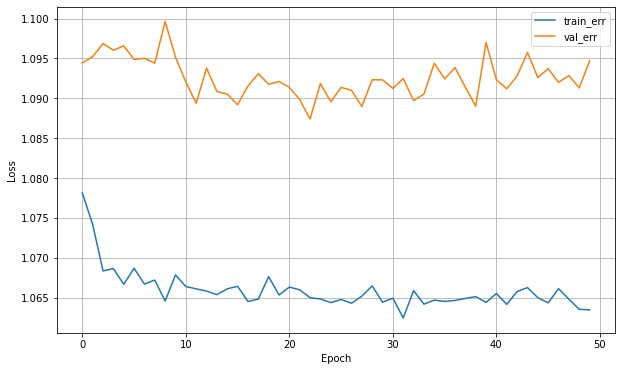

In [38]:
dl_history_plot(history)

In [45]:
pred = model.predict(x_val)
pred_1 = pred.argmax(axis=1)
print(confusion_matrix(y_val,pred_1))
print(classification_report(y_val,pred_1))

46/46 [==============================] - 0s 3ms/step
[[  1  34  20   0   0]
 [  3 197 238   1   0]
 [  0  98 543  17   0]
 [  0   5 234  36   0]
 [  0   0  33  10   0]]
              precision    recall  f1-score   support

           0       0.25      0.02      0.03        55
           1       0.59      0.45      0.51       439
           2       0.51      0.83      0.63       658
           3       0.56      0.13      0.21       275
           4       0.00      0.00      0.00        43

    accuracy                           0.53      1470
   macro avg       0.38      0.28      0.28      1470
weighted avg       0.52      0.53      0.47      1470



C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### (4) 실습2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 16) | 192 | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 8) | 136 | node, activation = 'relu'  |
| dense_2 (Dense) | (None, 5) | 45 | node, activation = 'softmax'  |

In [47]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential([Dense(16, input_shape=(nfeatures,), activation='relu'),
                   Dense(8, activation='relu'),
                   Dense(5, activation='softmax')])


# 모델요약
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 5)                 45        
                                                                 
Total params: 373
Trainable params: 373
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(optimizer=Adam(lr=0.01), loss='sparse_categorical_crossentropy')

In [52]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2).history

Epoch 1/50
86/86 [==============================] - 3s 13ms/step - loss: 1.2699 - val_loss: 1.2119
Epoch 2/50
86/86 [==============================] - 1s 7ms/step - loss: 1.1671 - val_loss: 1.1630
Epoch 3/50
86/86 [==============================] - 0s 5ms/step - loss: 1.1364 - val_loss: 1.1509
Epoch 4/50
86/86 [==============================] - 0s 4ms/step - loss: 1.1172 - val_loss: 1.1248
Epoch 5/50
86/86 [==============================] - 1s 7ms/step - loss: 1.1106 - val_loss: 1.1175
Epoch 6/50
86/86 [==============================] - 1s 7ms/step - loss: 1.1128 - val_loss: 1.1079
Epoch 7/50
86/86 [==============================] - 1s 9ms/step - loss: 1.1091 - val_loss: 1.1068
Epoch 8/50
86/86 [==============================] - 1s 8ms/step - loss: 1.1009 - val_loss: 1.1033
Epoch 9/50
86/86 [==============================] - 1s 7ms/step - loss: 1.0962 - val_loss: 1.1091
Epoch 10/50
86/86 [==============================] - 1s 7ms/step - loss: 1.0975 - val_loss: 1.1017
Epoch 11/50
86/86 

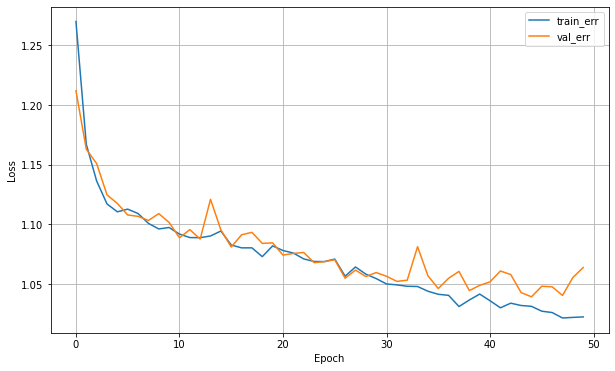

In [54]:
dl_history_plot(history)

In [56]:
pred = model.predict(x_val)
pred_1 = np.argmax(pred, axis=1)
pred[:2]

46/46 [==============================] - 0s 2ms/step


array([[5.0704890e-01, 3.7592176e-01, 1.1522355e-01, 1.7451586e-03,
        6.0662078e-05],
       [1.9871669e-02, 4.2742723e-01, 4.8632646e-01, 6.1176382e-02,
        5.1982254e-03]], dtype=float32)

In [58]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[  7  30  18   0   0]
 [  2 190 235  12   0]
 [  4  83 462 109   0]
 [  0   1 156 118   0]
 [  0   0  16  27   0]]
              precision    recall  f1-score   support

           0       0.54      0.13      0.21        55
           1       0.62      0.43      0.51       439
           2       0.52      0.70      0.60       658
           3       0.44      0.43      0.44       275
           4       0.00      0.00      0.00        43

    accuracy                           0.53      1470
   macro avg       0.43      0.34      0.35      1470
weighted avg       0.52      0.53      0.51      1470



C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
# 퀄리티 0과 4를 잘 못맞추고 있음. 
# 퀄리티 4 를 뽑을 수 있는 모델을 만들고 싶을 때는 0~3과 4로 나눠서 이원분류해야 더 성능이 좋을까요?
# 이런경우 이상탐지 영역으로 해결할 수도 있습니다

### (5) 실습3

* 이번에는 여러분이 원하는 대로 설계하고, 학습해 봅시다.


In [ ]:
# 메모리 정리


# Sequential 타입 모델 선언



# 모델요약

